In [154]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [132]:
# Reading and Understanding the data

df= pd.read_csv("Housing.csv")
df.shape
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [134]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Figure size 1200x800 with 0 Axes>

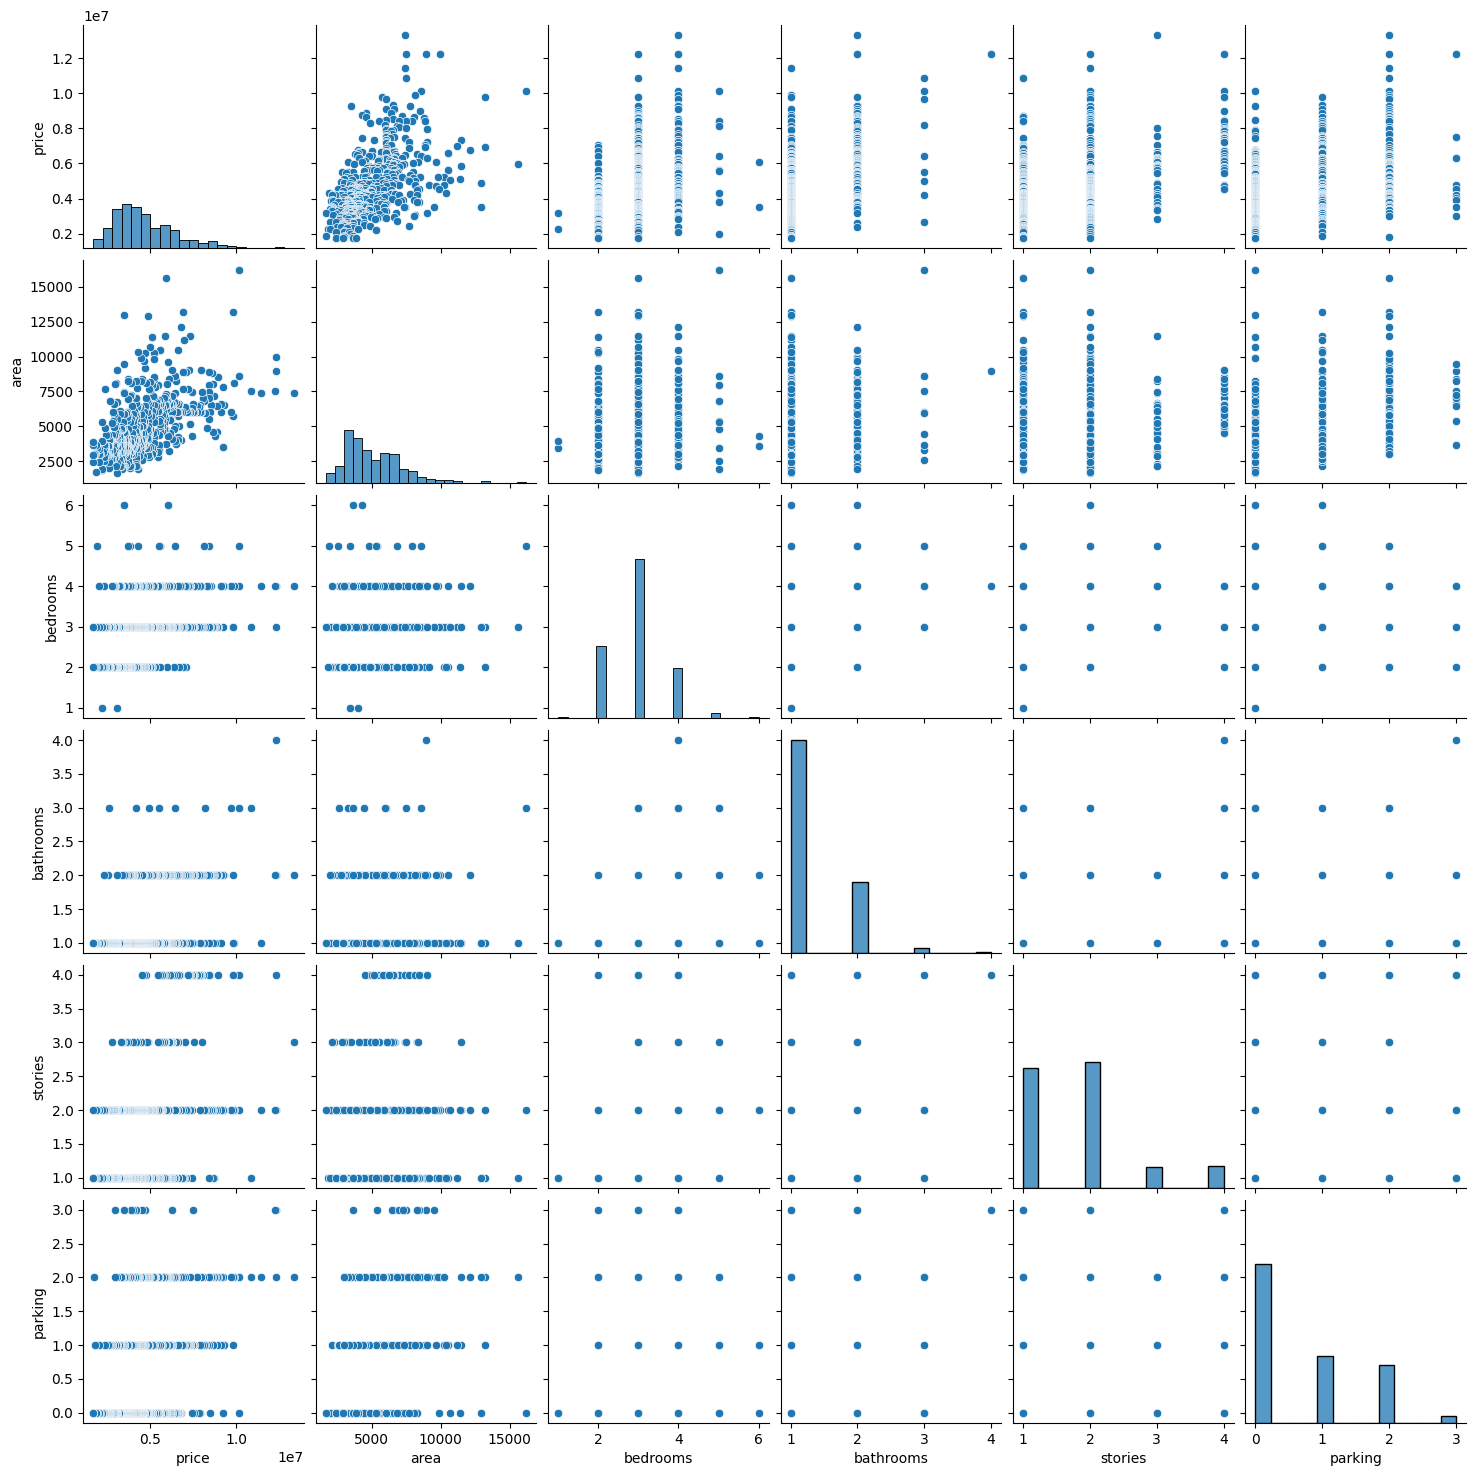

In [120]:
# Visualizing the numerical variables
plt.figure(figsize=(12,8))
sns.pairplot(df)


C:\Users\Mukul\AppData\Local\Temp\ipykernel_14640\4039879394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="Greens",annot=True)


<AxesSubplot: >

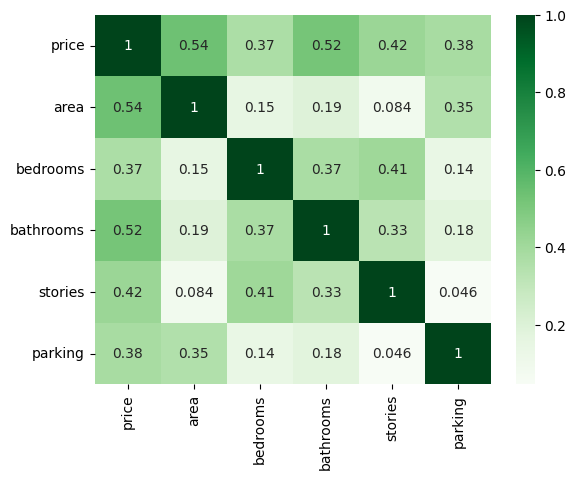

In [121]:
sns.heatmap(df.corr(),cmap="Greens",annot=True)

<AxesSubplot: xlabel='furnishingstatus', ylabel='price'>

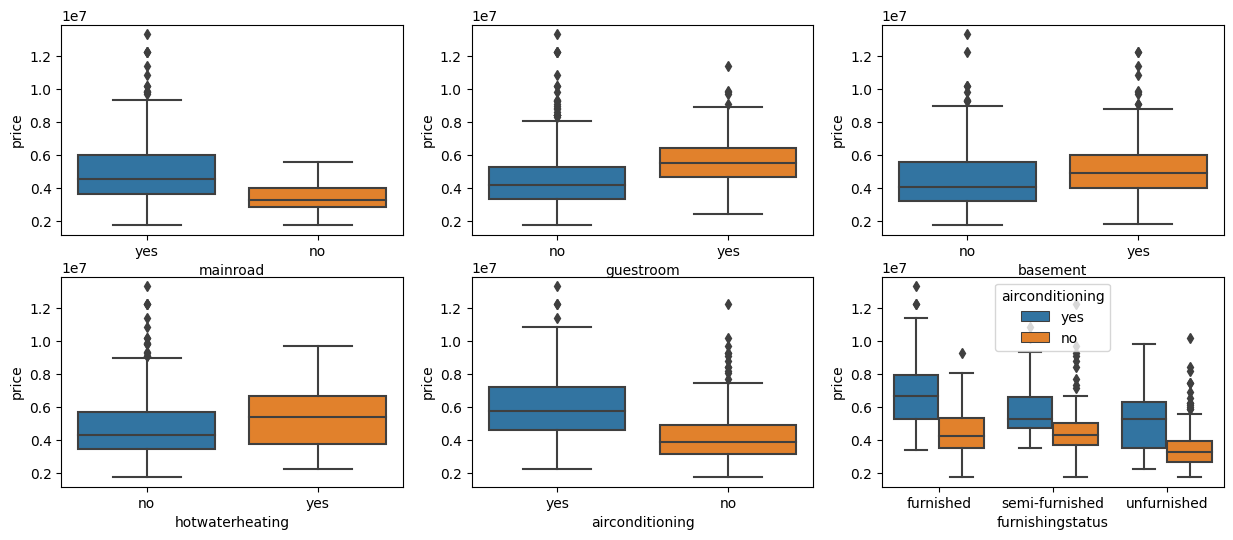

In [135]:
# Visualizing the categorical Variables
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
sns.boxplot(data=df,x="mainroad",y="price")
plt.subplot(2,3,2)
sns.boxplot(data=df,x="guestroom",y="price")
plt.subplot(2,3,3)
sns.boxplot(data=df,x="basement",y="price")
plt.subplot(2,3,4)
sns.boxplot(data=df,x="hotwaterheating",y="price")
plt.subplot(2,3,5)
sns.boxplot(data=df,x="airconditioning",y="price")
plt.subplot(2,3,6)
sns.boxplot(data=df,x="furnishingstatus",y="price",hue="airconditioning")

In [136]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

DATA PREPARATION 

In [137]:
# Recognising yes/no vars
varlist=[]
for i in df.columns:
    if len(df[i].value_counts())==2:
        varlist.append(i)


In [138]:
def replace(x):
    new=x.apply(lambda x:1 if x=="yes" else 0)
    return new 
df[varlist]=df[varlist].apply(lambda x:replace(x))

In [139]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [140]:
status=pd.get_dummies(df["furnishingstatus"],drop_first=True)

In [141]:
df=pd.concat([df,status],axis=1)

In [142]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [144]:
df.drop(columns=["furnishingstatus"],inplace=True)

In [145]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [147]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [152]:
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


In [160]:
# Rescaling 

num_vars=["price","area","bedrooms","bathrooms","stories","parking"]
scaler=MinMaxScaler()

In [162]:
df[num_vars]=scaler.fit_transform(df[num_vars])

In [164]:
# fit() ---> finds out the min and max values
# transform() ---> calculates x-xmin/xmax-xmin
# fit_transform() ---> does both fit() and transform() function